In [1]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

In [2]:
breast_imgs = glob.glob('C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)

C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


In [4]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0' :
        non_cancer_imgs.append(img)
    
    elif img[-5] == '1' :
        cancer_imgs.append(img)

In [5]:
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


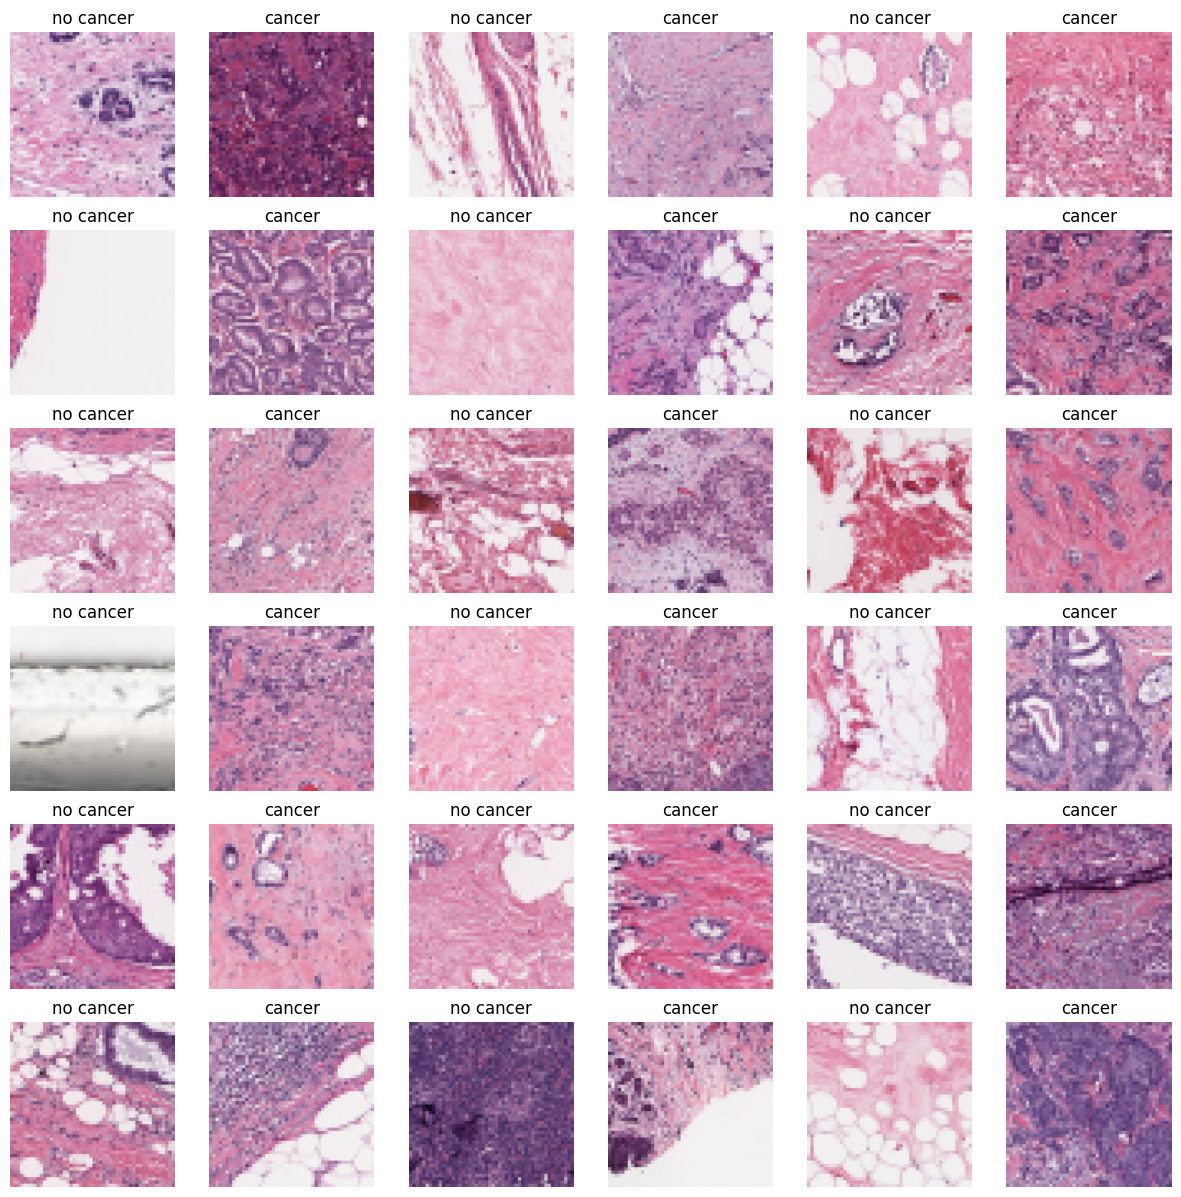

In [6]:
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_cancer_imgs), 18)
some_can = np.random.randint(0, len(cancer_imgs), 18)

s = 0
for num in some_non:
    
        img = image.image_utils.load_img((non_cancer_imgs[num]), target_size=(100, 100))
        img = image.image_utils.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    img = image.image_utils.load_img((cancer_imgs[num]), target_size=(100, 100))
    img = image.image_utils.img_to_array(img)
    plt.subplot(6, 6, 2*s)
    plt.axis('off')        
    plt.title('cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

In [7]:
import cv2
import numpy as np
import random

# Randomly sample images from two lists, 'non_cancer_imgs' and 'cancer_imgs'
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Initialize empty arrays to store image data and labels
non_img_arr = []  # Array for non-cancer images
can_img_arr = []  # Array for cancer images

# Loop through each image in the 'some_non_img' list
for img in some_non_img:
    # Read the image in color mode
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels) using linear interpolation
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image and label 0 (indicating non-cancer) to the 'non_img_arr'
    non_img_arr.append([n_img_size, 0])
    
# Loop through each image in the 'some_can_img' list
for img in some_can_img:
    # Read the image in color mode
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels) using linear interpolation
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image and label 1 (indicating cancer) to the 'can_img_arr'
    can_img_arr.append([c_img_size, 1])

# Combine non-cancer and cancer data
breast_img_arr = non_img_arr + can_img_arr

# Shuffle the combined array randomly
random.shuffle(breast_img_arr)

# Initialize lists for images and labels
X = []
y = []

# Loop through each element (image, label) in the shuffled 'breast_img_arr'
for feature, label in breast_img_arr:
    # Append the image data (feature) to the 'X' list
    X.append(feature)
    # Append the label to the 'y' list
    y.append(label)
    
# Convert the lists 'X' and 'y' into NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of the 'X' array
print('X shape: {}'.format(X.shape))


X shape: (277524, 50, 50, 3)


In [8]:
# Split the dataset into training and testing sets, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# # Define a rate (percentage) for subsampling the training data
# rate = 0.5

# # Calculate the number of samples to keep in the training data based on the rate
# num = int(X.shape[0] * rate)

# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
y_train = to_categorical(y_train, 2)  # Assuming there are 2 classes (non-cancer and cancer)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('X_val shape : {}' .format(X_val.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('y_val shape : {}' .format(y_val.shape))

X_train shape : (222019, 50, 50, 3)
X_test shape : (27753, 50, 50, 3)
X_val shape : (27752, 50, 50, 3)
y_train shape : (222019, 2)
y_test shape : (27753, 2)
y_val shape : (27752, 2)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
datagen = ImageDataGenerator(
    rescale = 1/.255
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
)

# Create data generators for training and testing
train_datagen = datagen.flow(X_train, y_train, batch_size=32)
val_datagen = datagen.flow(X_val, y_val, batch_size=32)
test_datagen = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

In [10]:
#Model Archiecture
# num_classes = y_train.shape[1] * y_train.shape[2]
#input layer
inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
x = inputs

# Convolutional Block
for filters in [32, 64, 128, 128]:
    x = tf.keras.layers.Conv2D(filters, kernel_size=3, padding="same", activation="relu",)(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size=3, padding="same", activation="relu",)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
#fully Connected layer
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.GlobalMaxPooling1D()(x)
# x = tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.03))(x)
# x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

#output layer
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0     

In [11]:
import datetime
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy","top_k_categorical_accuracy"])

model_folder ="D:\\FLODO\\trained_model"
# csv_path = os.path.join("files", "log.csv")
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Define the callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(f'{model_folder}/Breast_cancer_model_{timestamp}.keras', monitor="val_loss", verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-7),
    # tf.keras.callbacks.CSVLogger(csv_path),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=False)
]

# # Define the number of validation steps
# steps_per_epoch = len(image_paths_train) // BATCH_SIZE
# validation_steps = len(image_paths_val) // BATCH_SIZE


In [12]:
import time

# Start the timer
start_time = time.time()

# Training the model
history = model.fit( 
    train_datagen,
    # steps_per_epoch=steps_per_epoch,
    epochs=1000,
    validation_data=val_datagen,
    # validation_steps=validation_steps,
    callbacks=callbacks,
    # class_weight = class_weights
)

# Stop the timer after training completes
end_time = time.time()

# Calculate the total training time
training_time = end_time - start_time

# Print the total training time in a human-readable format (hours, minutes, seconds)
hours, rem = divmod(training_time, 3600)
minutes, seconds = divmod(rem, 60)


Epoch 1/1000
6934/6939 [============================>.] - ETA: 0s - loss: 0.3781 - accuracy: 0.8431 - top_k_categorical_accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.43397, saving model to D:\FLODO\trained_model\Breast_cancer_model_20241016-184723.keras
6939/6939 [==============================] - 75s 10ms/step - loss: 0.3780 - accuracy: 0.8432 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4340 - val_accuracy: 0.8245 - val_top_k_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/1000
6935/6939 [============================>.] - ETA: 0s - loss: 0.3263 - accuracy: 0.8652 - top_k_categorical_accuracy: 1.0000
Epoch 2: val_loss improved from 0.43397 to 0.31277, saving model to D:\FLODO\trained_model\Breast_cancer_model_20241016-184723.keras
6939/6939 [==============================] - 67s 10ms/step - loss: 0.3263 - accuracy: 0.8652 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.3128 - val_accuracy: 0.8674 - val_top_k_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoc

Epoch 20/1000
6934/6939 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9089 - top_k_categorical_accuracy: 1.0000
Epoch 20: val_loss did not improve from 0.22908
6939/6939 [==============================] - 70s 10ms/step - loss: 0.2204 - accuracy: 0.9089 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9056 - val_top_k_categorical_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 21/1000
6937/6939 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9089 - top_k_categorical_accuracy: 1.0000
Epoch 21: val_loss improved from 0.22908 to 0.22784, saving model to D:\FLODO\trained_model\Breast_cancer_model_20241016-184723.keras
6939/6939 [==============================] - 67s 10ms/step - loss: 0.2193 - accuracy: 0.9089 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2278 - val_accuracy: 0.9057 - val_top_k_categorical_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 22/1000
6933/6939 [============================>.] - ETA: 0s - loss: 0.2180 

In [13]:
print(f"Training Time: {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds.")

print("This is the End!!!")


Training Time: 0 hours, 35 minutes, and 14 seconds.
This is the End!!!


In [14]:
model.evaluate(test_datagen)

868/868 [==============================] - 4s 4ms/step - loss: 0.2310 - accuracy: 0.9051 - top_k_categorical_accuracy: 1.0000


[0.23095695674419403, 0.9050913453102112, 1.0]

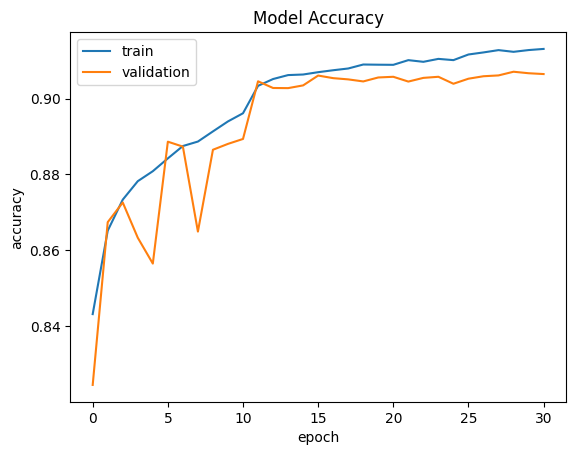

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

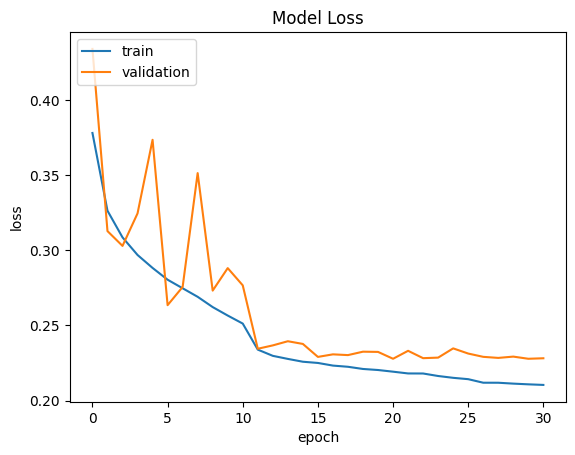

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

868/868 [==============================] - 3s 3ms/step


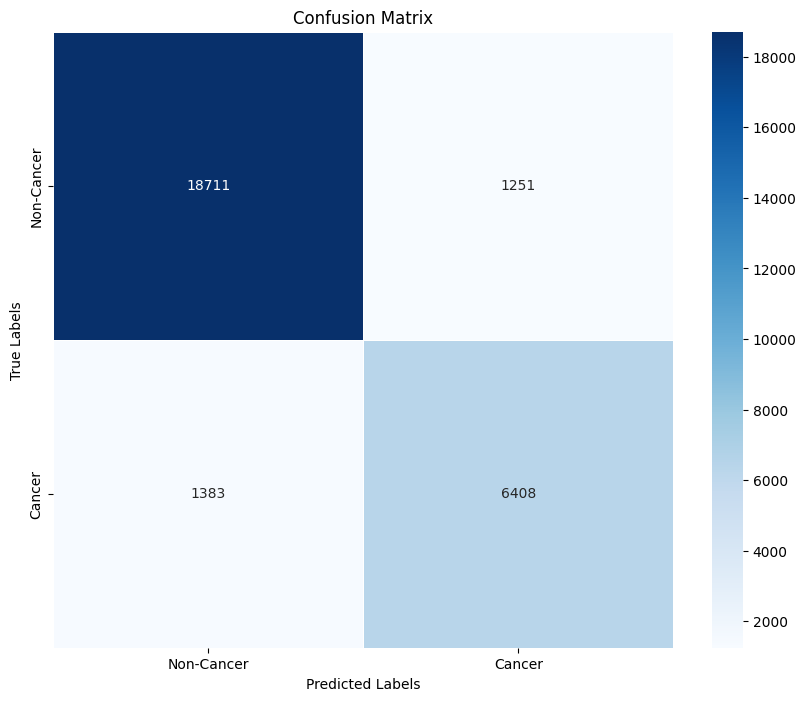

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict using the trained model
Y_pred = model.predict(test_datagen, steps=len(test_datagen))
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Extract true labels from the test generator
# This assumes that test_datagen is correctly set up with y_test
Y_true = np.argmax(y_test, axis=1)  # Modify this if your setup differs

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", linewidths=.5, cmap="Blues")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Cancer', 'Cancer'])
ax.yaxis.set_ticklabels(['Non-Cancer', 'Cancer'])
plt.show()


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming Y_pred and Y_true are already defined
# Y_pred is the output from model.predict, Y_pred_classes is obtained by np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)  # Make sure y_test is correctly prepared

# Calculate Precision, Recall, and F1 Score
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

# Calculate the probabilities for the positive class
Y_pred_probs = Y_pred[:, 1]  # assuming your model outputs probabilities for each class

# ROC AUC Score
roc_auc = roc_auc_score(Y_true, Y_pred_probs)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Precision: 0.84
Recall: 0.82
F1 Score: 0.83
ROC AUC Score: 0.96


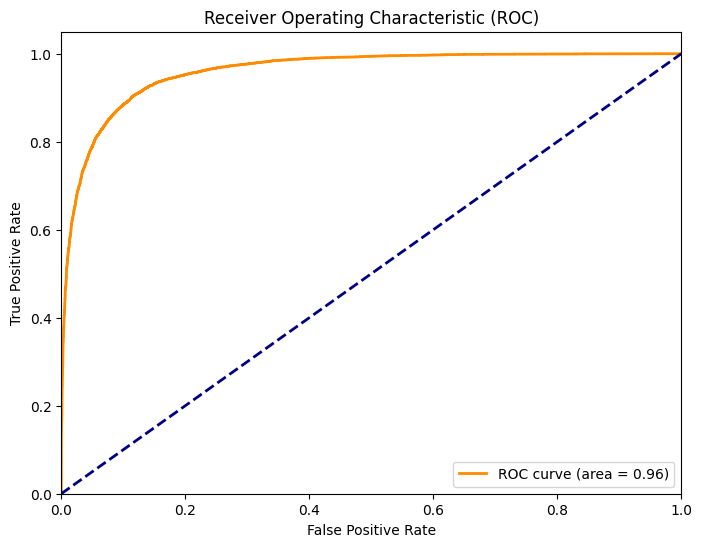

In [20]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_true, Y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


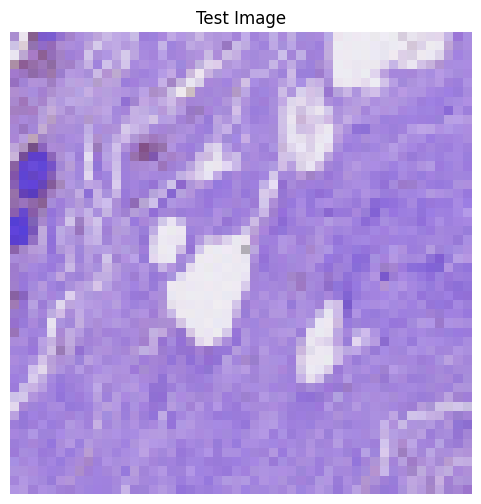

1/1 [==============================] - 0s 450ms/step
Predicted Diagnosis: Non-Cancerous
Calcification Type: No Calcification
True Diagnosis: Non-Cancerous


In [21]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Define a mapping of calcification types
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    5: 'VASCULAR',
    6: 'FINE_LINEAR_BRANCHING',
    7: 'COARSE',
    8: 'ROUND_AND_REGULAR-LUCENT_CENTER',
    9: 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
    10: 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE',
    11: 'ROUND_AND_REGULAR-EGGSHELL',
    12: 'PUNCTATE-PLEOMORPHIC',
    13: 'DYSTROPHIC',
    14: 'LUCENT_CENTERED',
    15: 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
    16: 'ROUND_AND_REGULAR',
    17: 'ROUND_AND_REGULAR-LUCENT_CENTERED',
    18: 'AMORPHOUS-PLEOMORPHIC',
    19: 'LARGE_RODLIKE-ROUND_AND_REGULAR',
    20: 'PUNCTATE-AMORPHOUS',
    21: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER',
    22: 'VASCULAR-COARSE-LUCENT_CENTERED',
    23: 'LUCENT_CENTER-PUNCTATE',
    24: 'ROUND_AND_REGULAR-PLEOMORPHIC',
    25: 'EGGSHELL',
    26: 'PUNCTATE-FINE_LINEAR_BRANCHING',
    27: 'VASCULAR-COARSE',
    28: 'ROUND_AND_REGULAR-PUNCTATE',
    29: 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
    30: 'SKIN-PUNCTATE',
    31: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
    32: 'PUNCTATE-ROUND_AND_REGULAR',
    33: 'LARGE_RODLIKE',
    34: 'AMORPHOUS-ROUND_AND_REGULAR',
    35: 'PUNCTATE-LUCENT_CENTER',
    36: 'SKIN',
    37: 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA',
    38: 'COARSE-PLEOMORPHIC',
    39: 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
    40: 'COARSE-LUCENT_CENTER',
    41: 'MILK_OF_CALCIUM',
    42: 'COARSE-ROUND_AND_REGULAR',
    43: 'SKIN-COARSE-ROUND_AND_REGULAR',
    44: 'ROUND_AND_REGULAR-AMORPHOUS',
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}
def img_plot(arr, index=0):
    # Check if the index is within the bounds of the array
    if index >= len(arr):
        print("Index is out of bounds.")
        return

    # Normalize the image to the range [0, 1] if not already
    img = arr[index].astype('float32')
    if img.max() > 1.0:
        img /= 255.0  # Assumes the max value could be 255, common in image data

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title('Test Image')
    plt.axis('off')  # Hide the axes
    plt.show()

# Ensure X_test is correctly prepared and in the expected format
index = 90  # Example index, ensure this is within the bounds of X_test
if index < len(X_test):
    img_plot(X_test, index)

    input_image = X_test[index:index+1]
    predicted_results = model.predict(input_image)
    predicted_class_index = np.argmax(predicted_results, axis=1)[0]
    true_class_index = np.argmax(y_test[index], axis=0)  # Adjust if y_test is not one-hot encoded

    predicted_label = class_labels[predicted_class_index]
    true_label = class_labels[true_class_index]
    calcification_type = calcification_types.get(predicted_class_index, "Unknown")

    print('Predicted Diagnosis:', predicted_label)
    print('Calcification Type:', calcification_type)
    print('True Diagnosis:', true_label)
else:
    print("The specified index is out of the range of the dataset.")


In [22]:
model.save('CNN_model_histopat_Update.h5')